In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-type-classification/weather_classification_data.csv


In [55]:
!pip install -U seaborn
!pip install -U pandas 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns',100)

In [6]:
df=pd.read_csv('/kaggle/input/weather-type-classification/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [7]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [8]:
target='Weather Type'
print(f"Target columns: {target}")

Target columns: Weather Type


# EDA

## Categorical Features Analysis

In [9]:
categorical_cols=df.select_dtypes(exclude='number').columns
print(f"Categorical Columns: {categorical_cols}")

Categorical Columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


In [10]:
df.describe(exclude="number")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


## Value Countplot

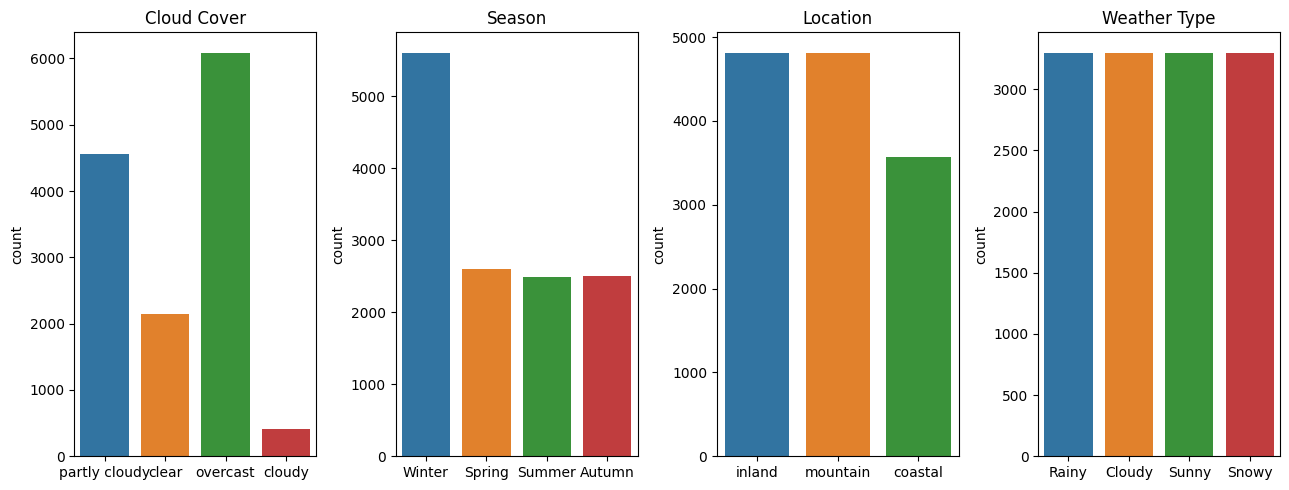

In [11]:
fig,ax=plt.subplots(nrows=len(categorical_cols)//4,ncols=4,figsize=(13,5))
ax = ax.flatten()
for i,col in enumerate(categorical_cols):
    k=sns.countplot(data=df,x=col,hue=col,ax=ax[i],legend=False)
    ax[i].set_title(col)
#     ax[i].tick_params(axis='x', rotation=45)
    ax[i].set_xlabel("")

plt.tight_layout()
plt.show()

## Crosstab Barplot with Chi-Square Test¶

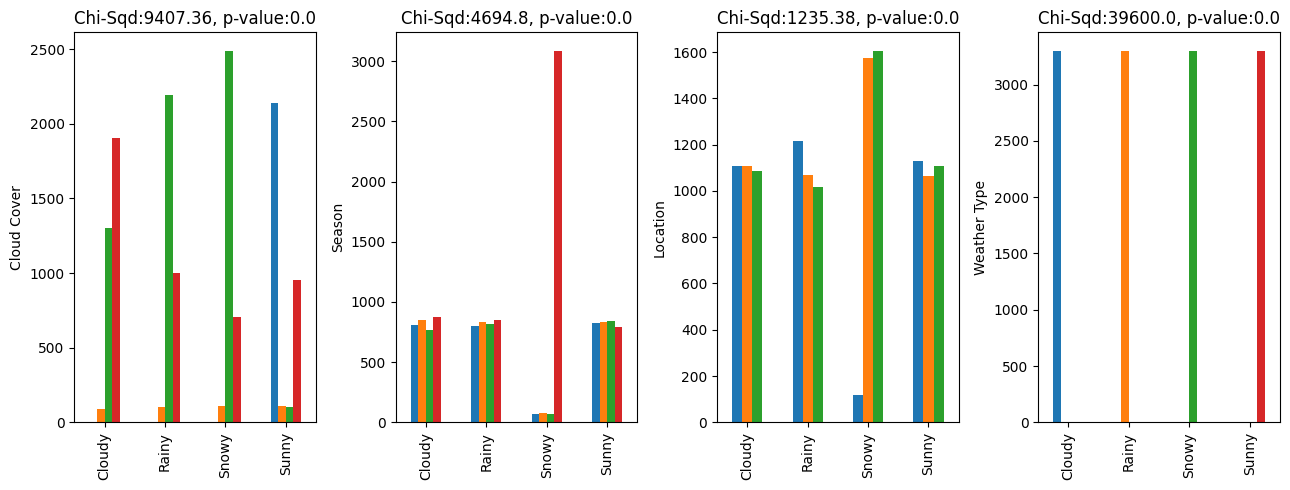

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(13,5))
ax = ax.flatten()
cat_selected=[]
for i,col in enumerate(categorical_cols):
    k=pd.crosstab(df[target],df[col])
    k.plot.bar(ax=ax[i],legend=False)
    
    stat, p, dof, expected = stats.chi2_contingency(k)
    text_str=f"Chi-Sqd:{round(stat,2)}, p-value:{round(p,2)}"
    if p<0.2 and col != target:
        cat_selected.append(col)
    
    ax[i].set_title(text_str)
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_xlabel("")
    ax[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### By observing above p-values of Chi-squared test we can conclude that only some features has significant effect on target with p-value<0.2¶

In [13]:
print(cat_selected)

['Cloud Cover', 'Season', 'Location']


# Numerical Features Analysis

In [14]:
numerical_cols=df.select_dtypes(include='number').columns
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [15]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


## Univariate Distribution Analysis with Skewness and Kurtosis Measures

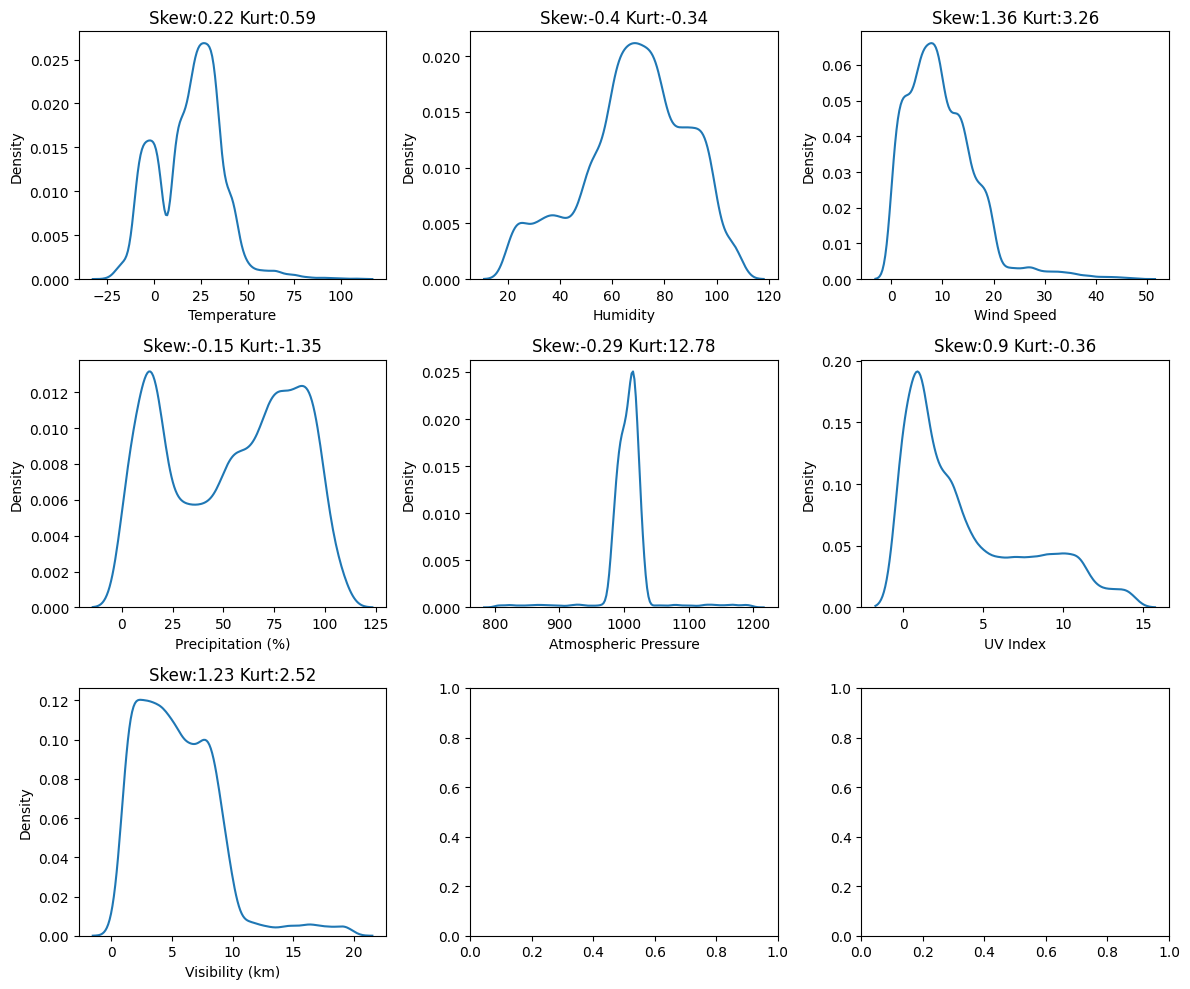

In [16]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
for i,col in enumerate(numerical_cols):
    k=sns.kdeplot(data=df,x=col,ax=ax[i])
    skewness=round(stats.skew(df[col],bias=False),2)
    kurt=round(stats.kurtosis(df[col],bias=False),2)
    text=f"Skew:{skewness} Kurt:{kurt}"
    ax[i].set_title(text)

plt.tight_layout()
plt.show()

## Univariate Boxplots

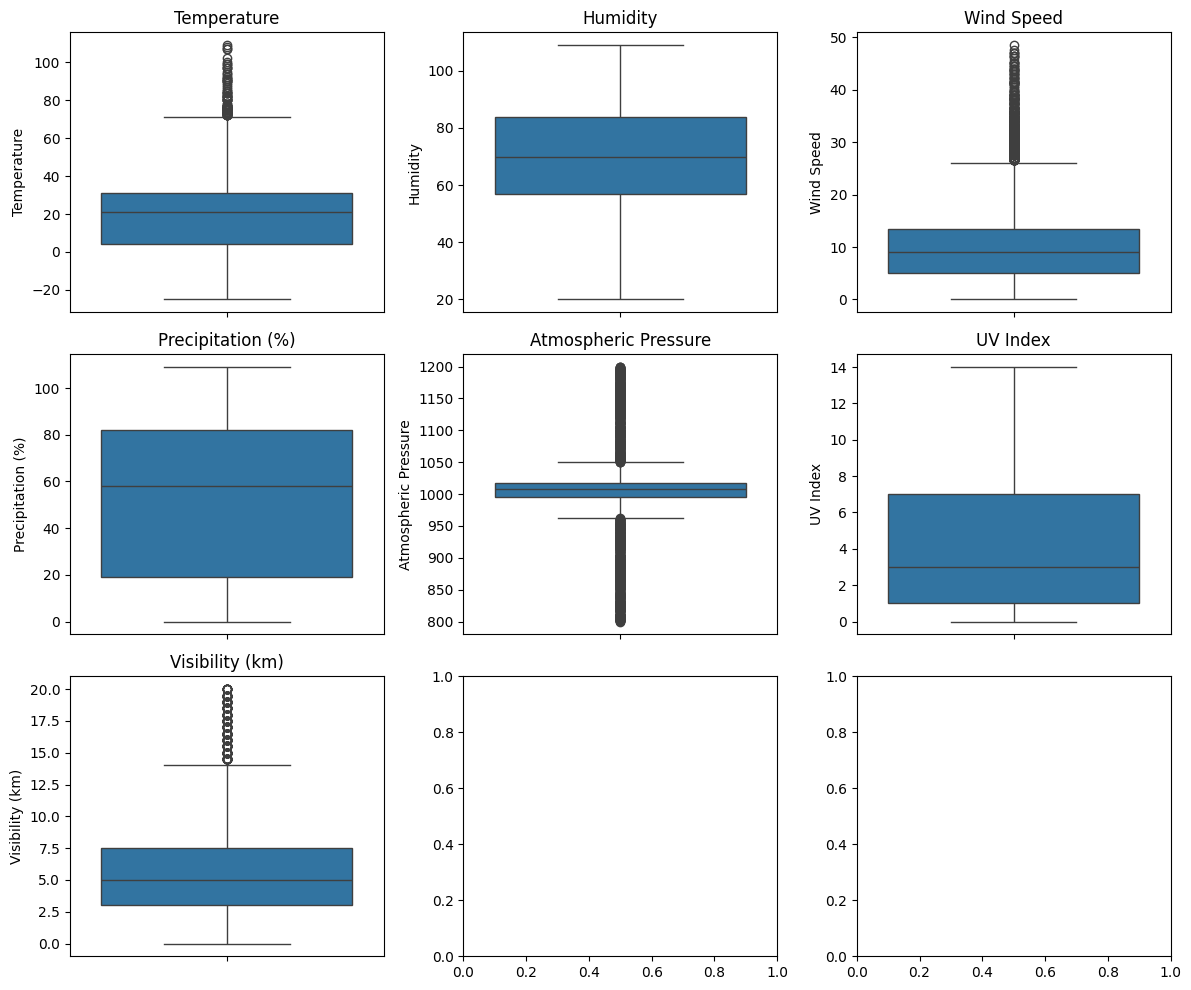

In [17]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()

for i,col in enumerate(numerical_cols):
    k=sns.boxplot(data=df,y=col,ax=ax[i])
    ax[i].set_title(col)
    
plt.tight_layout()
plt.show()

## Target VS Feature Barplot

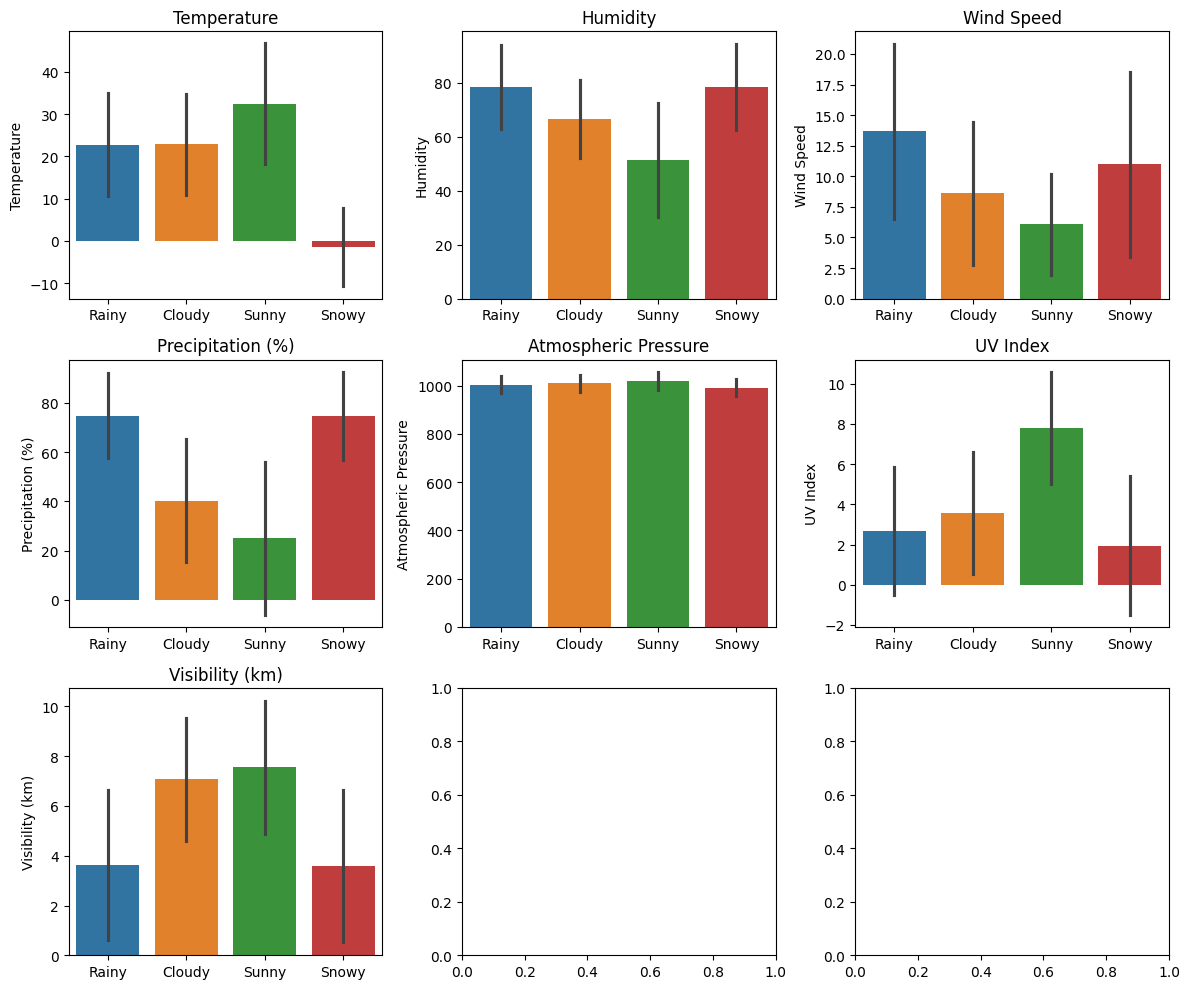

In [18]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
i=0
for col in numerical_cols:
    sns.barplot(data=df,x=target,y=col,hue=target,errorbar='sd',ax=ax[i],estimator=np.mean,legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    i+=1
    
plt.tight_layout()
plt.show()

## Target VS Feature Boxplot

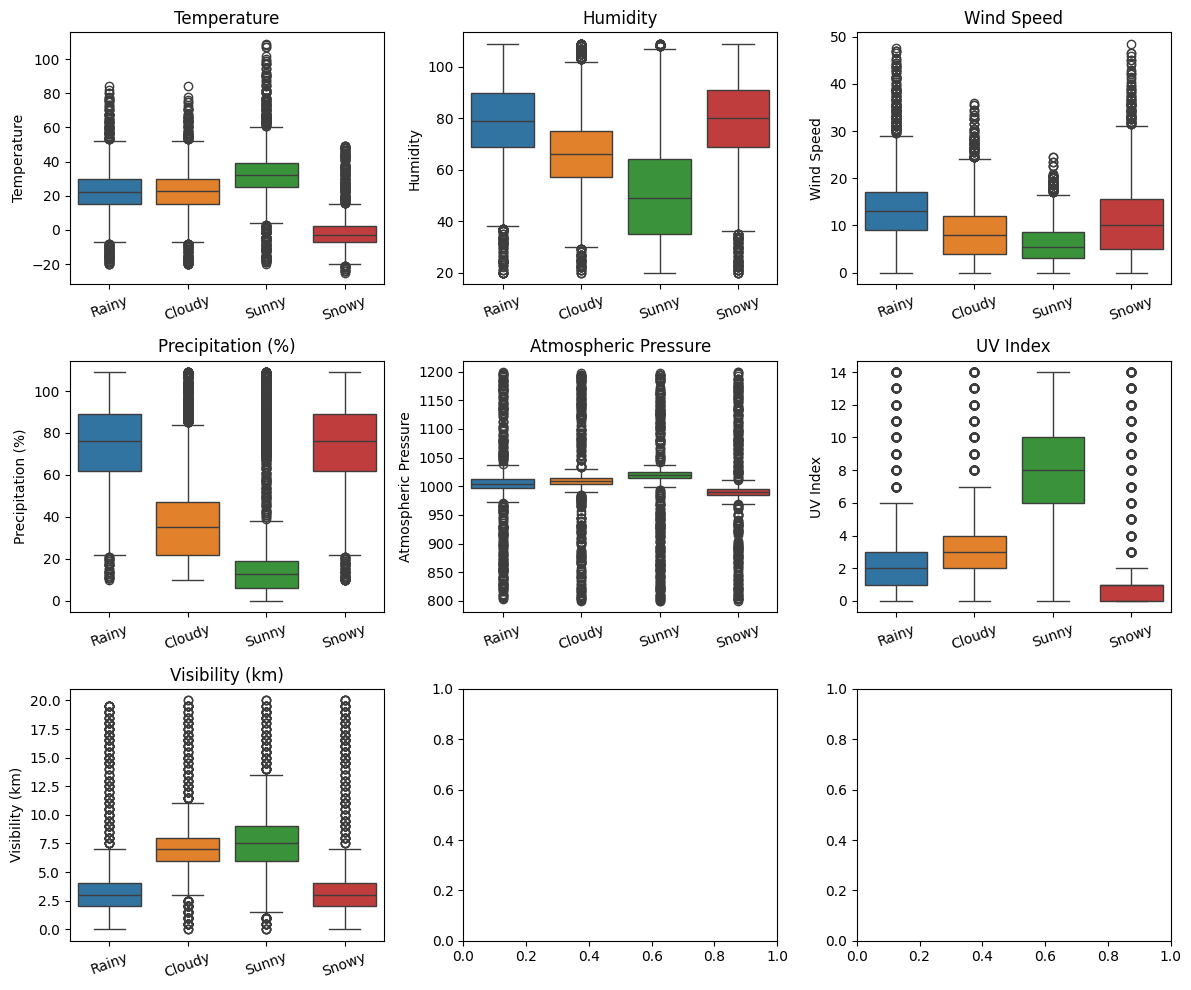

In [19]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
i=0
for col in numerical_cols:
    sns.boxplot(data=df,x=target,y=col,hue=target,ax=ax[i],legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=20)
    ax[i].set_xlabel("")
    i+=1
        
plt.tight_layout()
plt.show()

## Target VS Feature Stripplot

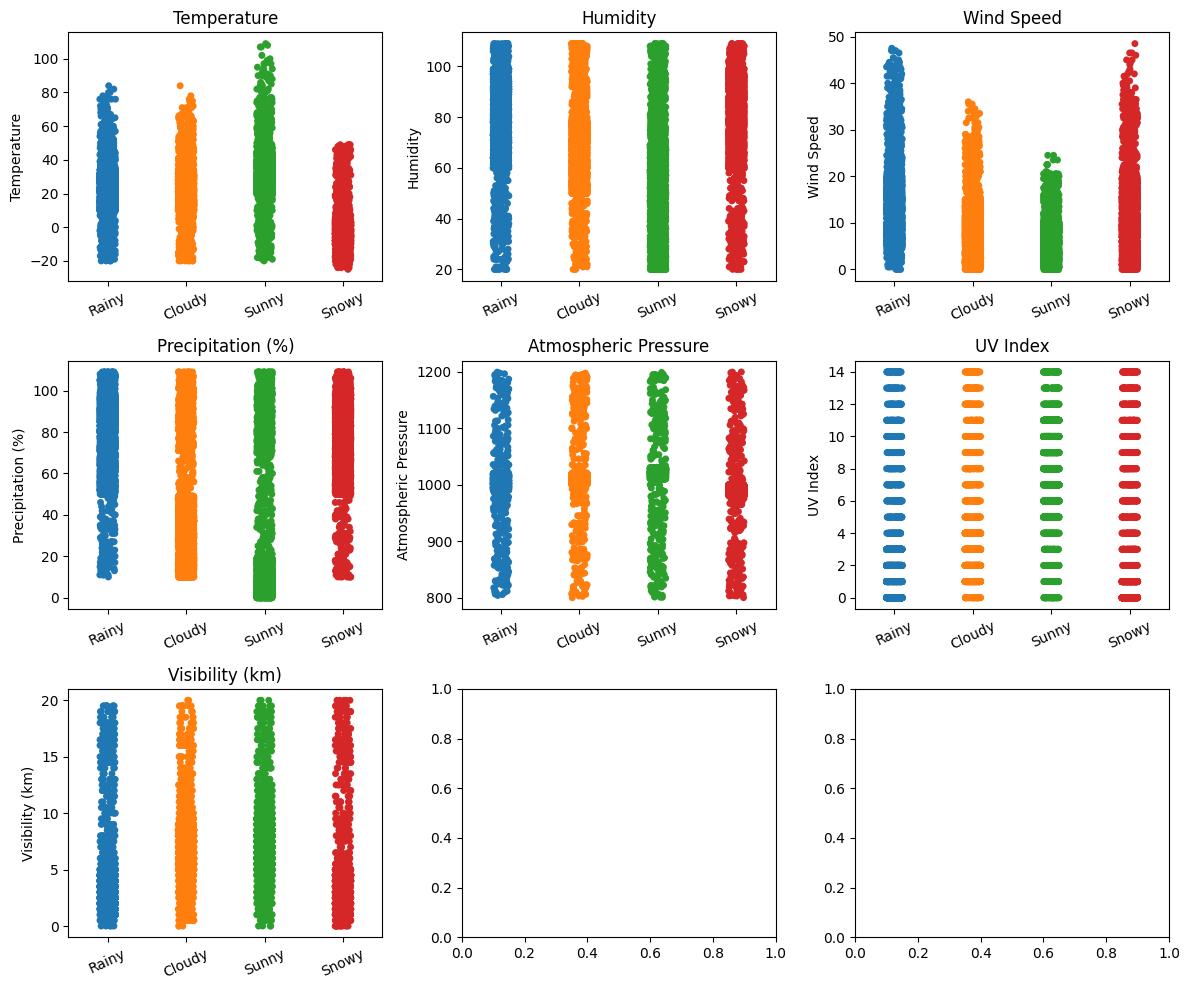

In [20]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
i=0
for col in numerical_cols:
    sns.stripplot(data=df,x=target,y=col,hue=target,ax=ax[i],legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=25)
    ax[i].set_xlabel("")
    i+=1
    
plt.tight_layout()
plt.show()

## Labelwise Feature Distribution with ANOVA Test

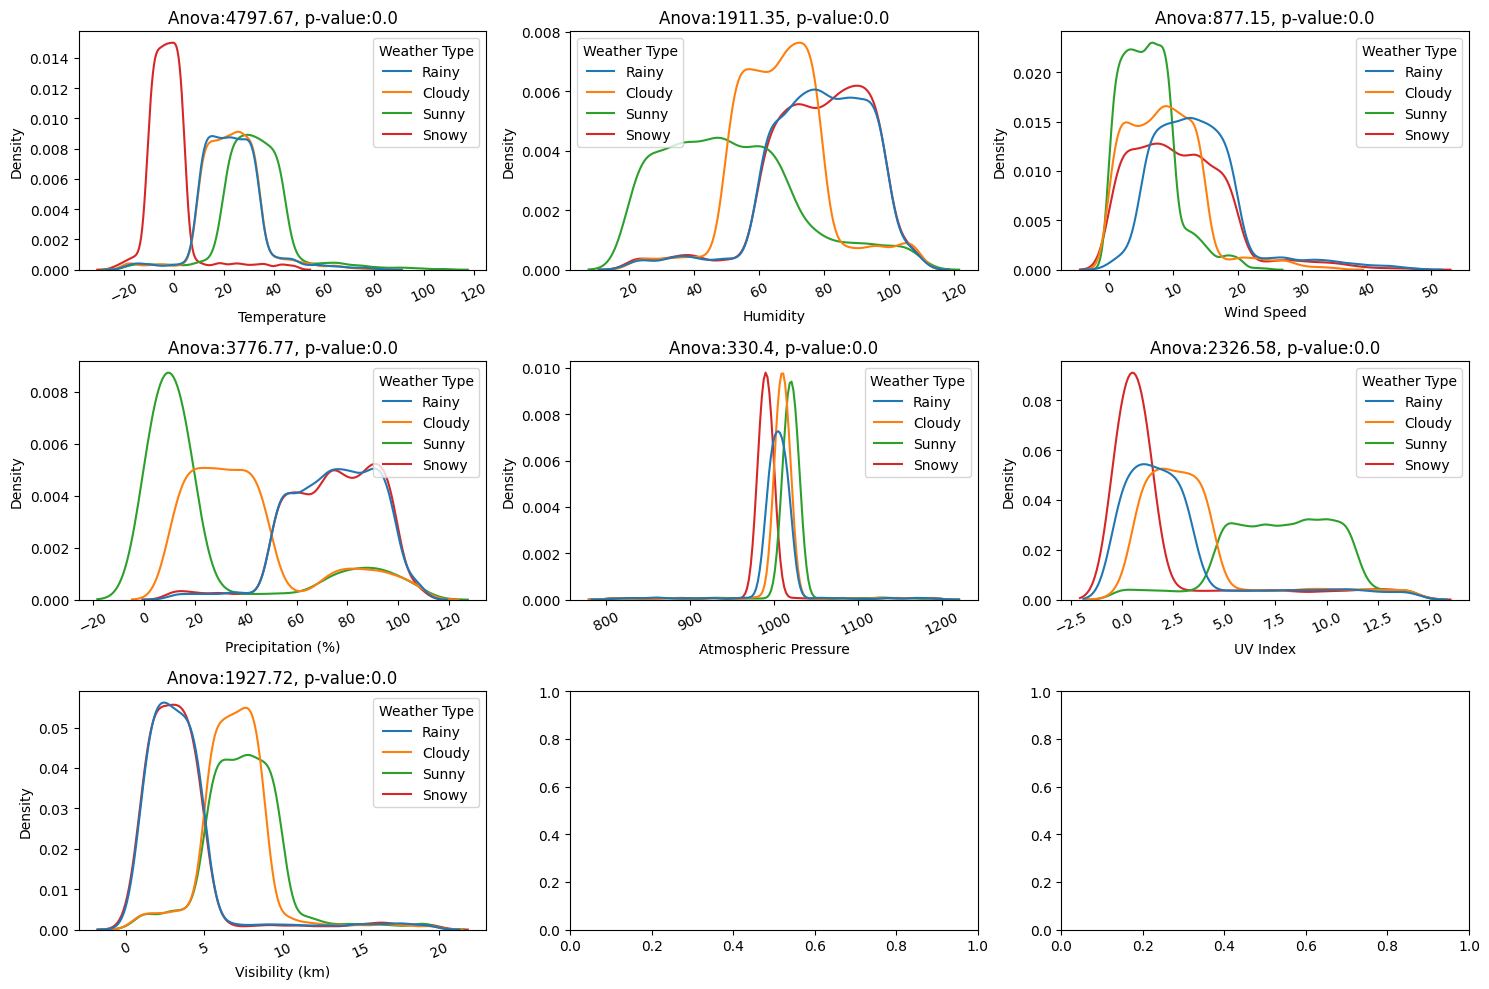

In [21]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax = ax.flatten()
i=0
num_selected=[]
for col in numerical_cols:
    k=dict(list(df.groupby(target)[col]))
    f,p=stats.f_oneway(*k.values())
    text_str=f"Anova:{round(f,2)}, p-value:{round(p,2)}"

    if p<0.2 and col not in num_selected:
            num_selected.append(col)
        
    sns.kdeplot(data=df,x=col,hue=target,ax=ax[i])
    ax[i].set_title(text_str)
    ax[i].tick_params(axis='x', rotation=25)
    i+=1
        
plt.tight_layout()
plt.show()

### By observing above p-values we can conclude that only some features has significant effect on target with p-value<0.2

In [22]:
print(num_selected)

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


## Heatmap

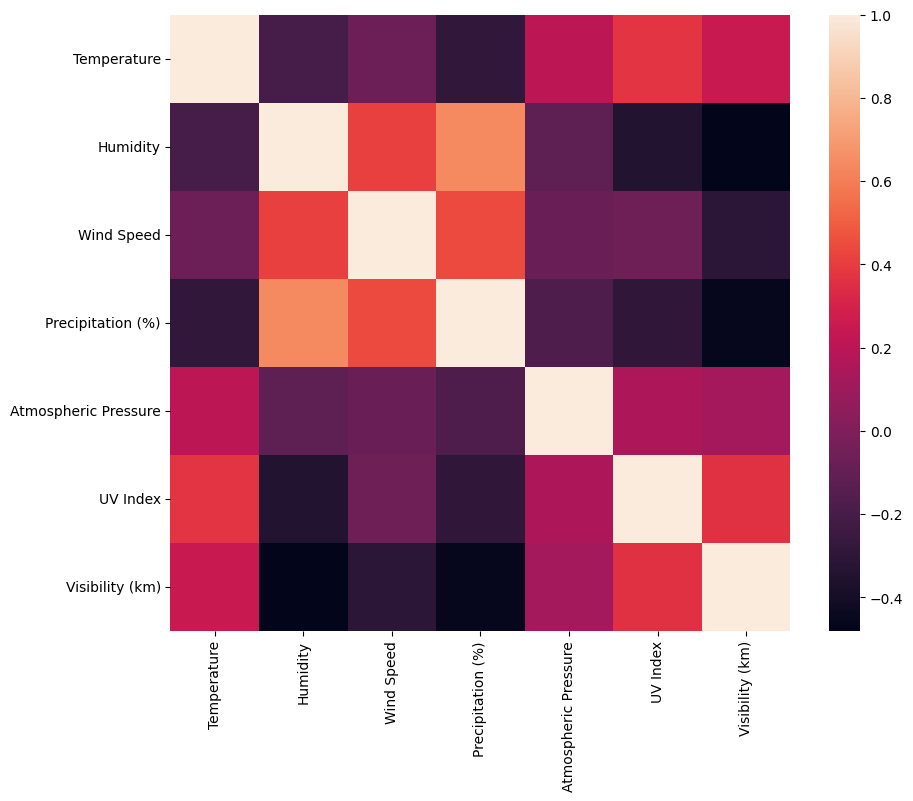

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr())
plt.show()

# Preprocessing

In [24]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [25]:
X = df[cat_selected+num_selected].values
Y = df[target].values

## Splitting Dataset

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Label Encoding Target Column

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Normalization

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train[:,len(cat_selected):]=ss.fit_transform(x_train[:,len(cat_selected):])
x_test[:,len(cat_selected):]=ss.transform(x_test[:,len(cat_selected):])

## One Hot Encoding Categorical Features

In [29]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(sparse_output=False),[*range(len(cat_selected))])],remainder="passthrough")
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.transform(x_test))

# Training Models

In [30]:
all_models=[]

## Support Vector Classifier

In [31]:
from sklearn.svm import SVC
classifier1=SVC(C=30,kernel="rbf")
all_models.append(('svc',classifier1))
classifier1.fit(x_train,y_train)

SVC(C=30)

In [32]:
y_pred1=classifier1.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred1))
print("Accuracy Score:",accuracy_score(y_test,y_pred1))

[[580  45  14  20]
 [ 27 622  23  10]
 [ 11  19 620  14]
 [ 22  17   7 589]]
Accuracy Score: 0.9132575757575757


## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=100,criterion="gini",random_state=0)
all_models.append(('random_forest',classifier2))
classifier2.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_pred2=classifier2.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred2))
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

[[598  32  11  18]
 [ 24 632  11  15]
 [ 15  16 616  17]
 [ 19  20   7 589]]
Accuracy Score: 0.9223484848484849


## Logistic Regresssion

In [37]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression(max_iter=1000)
all_models.append(('logistic',classifier3))
classifier3.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred3=classifier3.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred3))
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

[[557  65  12  25]
 [ 44 572  53  13]
 [ 21   8 619  16]
 [ 53  15  16 551]]
Accuracy Score: 0.8708333333333333


## Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier4=GaussianNB()
all_models.append(('naive_bayes',classifier4))
classifier4.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred4=classifier4.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

[[524  88  46   1]
 [ 59 520 103   0]
 [ 35  15 613   1]
 [195  24   7 409]]
Accuracy Score: 0.7825757575757576


## KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier5=KNeighborsClassifier(n_neighbors=15,p=5,metric="minkowski")
all_models.append(('knn',classifier5))
classifier5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15, p=5)

In [44]:
y_pred5=classifier5.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_pred5))
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

[[571  54   9  25]
 [ 32 608  32  10]
 [ 16  15 618  15]
 [ 39  27   8 561]]
Accuracy Score: 0.8931818181818182


## Random Forest Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier6=DecisionTreeClassifier(criterion="entropy",random_state=0)
all_models.append(('decision_tree',classifier6))
classifier6.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_pred6=classifier6.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred6))
print("Accuracy Score:",accuracy_score(y_test,y_pred6))

[[587  32  15  25]
 [ 38 613  15  16]
 [ 17  15 616  16]
 [ 23  11  11 590]]
Accuracy Score: 0.9113636363636364


## XGBoost Classifier

In [49]:
import xgboost as xgb
classifier7=xgb.XGBClassifier()
all_models.append(('xgboost',classifier7))
classifier7.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred7=classifier7.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred7))
print("Accuracy Score:",accuracy_score(y_test,y_pred7))

[[591  31  14  23]
 [ 24 628  12  18]
 [ 11  14 623  16]
 [ 13  14  12 596]]
Accuracy Score: 0.9234848484848485


## Ensemble Model (Voting Based)

In [52]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(all_models, voting='hard')
final_model.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC(C=30)),
                             ('random_forest',
                              RandomForestClassifier(random_state=0)),
                             ('logistic', LogisticRegression(max_iter=1000)),
                             ('naive_bayes', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=15, p=5)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('xgboost',
                              XGBClassifier(base_score=None, boo...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

In [53]:
y_pred_final=final_model.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred_final))
print("Accuracy Score:",accuracy_score(y_test,y_pred_final))

[[596  43   8  12]
 [ 24 638  11   9]
 [ 18  16 617  13]
 [ 33  17   6 579]]
Accuracy Score: 0.9204545454545454
